In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filepath = r"C:\Users\jjap2\Downloads\dond_game_data.csv"
df = pd.read_csv(filepath)

In [2]:
samplesize = df['Contestant Name'].nunique()
print("Sample size:", samplesize)
# this number is incorrect because of duplicate names for contestants, i think there's 102?

Sample size: 99


In [3]:
df['Offer Percent of Average'].mean()

0.592478290909091

In [8]:
cha = df[df['Contestant Name']=='Cha Cha']
display(cha)


,Game ID,Round,Contestant Name,Contestant Gender,Contestant Race,Remaining Values,Board Value,Board Average,Board Balance,Previous Offer,Offer,Offer Percent of Average,Deal,Amount Won,Postgame,Probability of Big Value
7,4,1,Cha Cha,Female,White,"[1, 5, 25, 50, 75, 100, 200, 300, 400, 500, 75...",3008406,150420,0.884,0.0,20000.0,0.1330,0,0,0,0.300
8,4,2,Cha Cha,Female,White,"[1, 5, 25, 75, 100, 200, 300, 400, 750, 5000, ...",2306856,153790,0.878,20000.0,53000.0,0.3446,0,0,0,0.267
22,4,3,Cha Cha,Female,White,"[1, 5, 25, 75, 100, 200, 400, 100000, 400000, ...",2250806,204619,1.974,53000.0,78000.0,0.3812,0,0,0,0.364
23,4,4,Cha Cha,Female,White,"[5, 25, 75, 100, 200, 400, 400000, 1000000]",1400805,175101,1.230,78000.0,65000.0,0.3712,0,0,0,0.250
24,4,5,Cha Cha,Female,White,"[25, 75, 100, 200, 400, 400000]",400800,66800,0.354,65000.0,49000.0,0.7335,1,49000,0,0.167


In [5]:
win = df[df['Amount Won'] > 0]
# win['Round'].describe()
# win['Offer Percent of Average'].describe()
display(win)

,Game ID,Round,Contestant Name,Contestant Gender,Contestant Race,Remaining Values,Board Value,Board Average,Board Balance,Previous Offer,Offer,Offer Percent of Average,Deal,Amount Won,Postgame,Probability of Big Value
6,3,8,Pyong,Male,Asian,"[75, 750, 750000]",750825,250275,0.643,291000.0,211000.00,0.8431,1,211000,0,0.333
12,1,4,Tony,Male,White,"[25, 750, 5000, 10000, 50000, 200000, 300000, ...",1065775,133222,0.972,169000.0,94000.00,0.7056,1,94000,0,0.375
24,4,5,Cha Cha,Female,White,"[25, 75, 100, 200, 400, 400000]",400800,66800,0.354,65000.0,49000.00,0.7335,1,49000,0,0.167
30,5,6,Eric,Male,Black,"[1, 50, 300, 25000, 300000]",325351,65070,0.655,51000.0,59000.00,0.9067,1,59000,0,0.200
43,7,5,Jessica,Female,White,"[1, 5, 10, 400, 75000, 200000]",275416,45903,0.468,21000.0,40000.00,0.8714,1,40000,0,0.167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,88,5,David,Male,White,"[25, 200, 500, 10000, 300000, 750000]",1060725,176788,1.034,117000.0,83000.00,0.4695,1,100000,0,0.333
800,104,9,Tony,Male,White,"[0, 100]",100,50,0.041,40.0,70.00,1.4000,1,70,0,0.000
806,105,6,Janelle,Female,Black,"[10, 10000, 200000, 400000, 500000]",1110010,222002,78.506,103000.0,165000.00,0.7432,1,165000,0,0.600
815,106,7,George,Male,Hispanic,"[75, 100, 300, 750000]",750475,187619,1.117,277000.0,119000.00,0.6343,1,119000,0,0.250


# split Remaining Values

problems with the data:
- multiple tony's (does this even matter)
- splitting remaining values column
- figure out what to with prob big value (maybe toss it)

findings:
- mean round win is 7.08, med is 7
- mean offer percent of average = .7351, med .8321
- postgame = 1 just means after they win, they go through the remainder of what they would have done
- prob big value is just how likely are you to get a case with over $100,000

decisions: 
- will go based off game id

<function matplotlib.pyplot.show(close=None, block=None)>

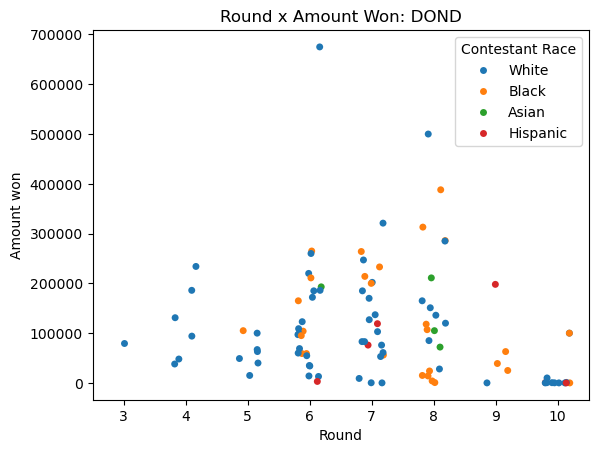

In [6]:
sns.stripplot(data=win, x='Round', y='Amount Won', jitter=.2, hue="Contestant Race")
plt.xlabel('Round')
plt.ylabel('Amount won')
plt.title('Round x Amount Won: DOND')

plt.show

In [7]:
win['Amount Won'].describe()

count       102.000000
mean     112705.441176
std      112469.834686
min           5.000000
25%       29500.000000
50%       89500.000000
75%      171500.000000
max      675000.000000
Name: Amount Won, dtype: float64